<div style="width:100%;height:125px;text-align:center;border: 4px solid #392424;background-color:#392424;color:white">

<header  style="width:100%;height:100px;">
  <h1><b>Chapter 7.1</b></h1>
    <h4>Titanic_(example from kaggle)</h4>
</header>

<div> 

# brief contents:

<div style="position: relative;height:100px;">
    
<div  style="width:300px;position:absolute;left: auto;border: 4px solid white;background-color:#392424;color:white">
    <header></header>
    <a href="#pre" style="padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>Pre_processin</b></h4>
      </a>
 </div>
    
 <div style="width:300px;position:absolute;left: 305px;border: 4px solid white;background-color:#392424;color:whitee">
    <header></header>
    <a href="#load_data"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>Load Data</b></h4>
      </a>
     
  </div>
    <div style="width:300px;position:absolute;left: 610px;border: 4px solid white;background-color:#392424;color:white">
    <header></header>
    <a href="#model"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>Model</b></h4>
      </a>
        </div>

    
   <div  style="width:300px;position:absolute;left: 915px;border: 4px solid white;background-color:#392424;color:white">
    <header></header>
    <a href="#test_model"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>Test Model</b></h4>
      </a>
    </div>
  
    
   <div  style="width:300px;position:absolute;left: 1220px;border: 4px solid white;background-color:#392424;color:white">
    <header></header>
    <a href="#list"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b></b></h4>
      </a>
    </div>
</div>

<div id="#pre" style="width:100%;height:70px;border: 4px solid #392424;background-color:#392424;color:white;text-align:center;border-radius: 25px;padding:3px">
  <header><h2><b>Pre_processing funcation</b></h2></header>
</div>

In [4]:
def modify_Fare(train, test):
    data = [train, test]
    for dataset in data:
        dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
        dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
        dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
        dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
        dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
        dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
        dataset['Fare'] = dataset['Fare'].astype(int)
    return train, test

def modify_Embarked(train, test):
    ports = {"S": 0, "C": 1, "Q": 2}
    train.Embarked = train.Embarked.map(ports)
    test.Embarked = test.Embarked.map(ports)
    return train, test


def modify_sex(train, test):
    genders = {'male':0, "female":1}
    train.Sex = train.Sex.map(genders) 
    test.Sex = test.Sex.map(genders) 
    
    return train, test

def modify_name(train, test):
    titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    
    data = [train, test]
    for dataset in data:
        # extract titles
        dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
        # replace titles with a more common title or as Rare
        dataset['Title'] = dataset['Title'].replace(['Lady', 
                                                      'Countess','Capt', 
                                                     'Col','Don', 'Dr','Major', 
                                                     'Rev', 'Sir', 'Jonkheer', 'Dona'],
                                                    'Rare')
        dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
        
        # convert titles into numbers
        dataset['Title'] = dataset['Title'].map(titles)
        # filling NaN with 0, to get safe
        dataset['Title'] = dataset['Title'].fillna(0)
    train = train.drop(['Name'], axis=1)
    test = test.drop(['Name'], axis=1)
    
    return train, test


def missing_random():
    data = [train_df, test_df]
    for dataset in data:
        mean = train_df["Age"].mean()
        std = test_df["Age"].std()
        is_null = dataset["Age"].isnull().sum()
        # compute random numbers between the mean, std and is_null
        rand_age = np.random.randint(mean - std, mean + std, size = is_null)
        # fill NaN values in Age column with random values generated
        age_slice = dataset["Age"].copy()
        age_slice[np.isnan(age_slice)] = rand_age
        dataset["Age"] = age_slice
        dataset["Age"] = train_df["Age"].astype(int)
    print(train_df["Age"].isnull().sum())
    return train_df, test_df


def modify_cabin(train, test):
    deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
    data = [train,test]
    for dataset in data:
        dataset['Cabin'] =dataset['Cabin'].fillna('U0')
        dataset['Deck'] = dataset["Cabin"].map(
            lambda x : re.compile('([a-zA-z]+)').search(x).group())
        dataset['Deck'] = dataset['Deck'].map(deck)
        dataset['Deck'] = dataset['Deck'].fillna(0)
        dataset['Deck'] = dataset['Deck'].astype(int)
        
def modify_age(train, test):
    data= [train, test]
    for dataset in data:
        dataset['Age'] = dataset['Age'].astype(int)
        dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
        dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
        dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
        dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
        dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
        dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
        dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
        dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
        
    return train, test
def make_relative(train, test):
    data = [train, test]
    for dataset in data:
        dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
        dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
        dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
        dataset['not_alone'] = dataset['not_alone'].astype(int)
    return train, test

def Fare_per_Person(train, test):
    data = [train, test]
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
    return train, test
def data_modify(train, test):
    train = train.drop(['PassengerId',"Ticket"],axis=1)
    test = test.drop(['Ticket'],axis=1)
    
    # Cabin
    modify_cabin(train, test)
    train = train.drop(['Cabin'], axis=1)
    test = test.drop(['Cabin'], axis=1)
    
    # Age:
    missing_median(train,'Age')
    missing_median(test,'Age')
    train, test = modify_age(train, test)
    
    # Embarked
    missing_maxitration(train,'Embarked')
    missing_maxitration(test,'Embarked')
    train, test = modify_Embarked(train, test)
    
    # Fare
    train['Fare'], test['Fare'] = train["Fare"].fillna(0),test['Fare'].fillna(0)
    train['Fare'],test['Fare'] = train["Fare"].astype(int),test['Fare'].astype(int)
    
    # Name
    train, test = modify_name(train, test)
    
    #Sex 
    train, test = modify_sex(train, test)
    
    
    # Fare
    train, test = modify_Fare(train, test)
    
    # Creating new Features
    train, test = make_relative(train, test)
    train['Age_Class'] = train.Age * train.Pclass
    test['Age_Class'] = test.Age * test.Pclass
    
    train, test = modify_age(train, test)
    
    return train, test

<div id="#load_data" style="width:100%;height:70px;border: 4px solid #392424;background-color:#392424;color:white;text-align:center;border-radius: 25px;padding:3px">
  <header><h2><b>Load data</b></h2></header>
</div>

In [2]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline

from farhad_DL.utility import missing_median, missing_default,missing_maxitration


df_train= pd.read_csv("data/Chapter7/Chapter7.1-titanic/train.csv",na_values=["NA","?"," "])
df_test = pd.read_csv("data/Chapter7/Chapter7.1-titanic/test.csv", na_values=["NA","?"])

df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
df_train, df_test = data_modify(df_train, df_test)

In [7]:
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,relatives,not_alone,Age_Class
0,0,3,0,0,1,0,0,0,8,1,1,0,6
1,1,1,1,0,1,0,3,1,3,3,1,0,5


In [36]:
df_test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,relatives,not_alone,Age_Class
0,892,3,0,0,0,0,0,2,8,1,0,1,15
1,893,3,1,0,1,0,0,0,8,3,1,0,18


In [6]:
from sklearn.model_selection import validation_curve,learning_curve

In [98]:
from farhad_DL.utility import encode_text_dummy

In [101]:
df_train = df_train.drop(['not_alone','Parch','SibSp'],axis=1)
encode_text_dummy(df_train, 'Sex')
encode_text_dummy(df_train, 'Title')
encode_text_dummy(df_train, 'Age_Class')
encode_text_dummy(df_train, 'Deck')
encode_text_dummy(df_train, 'Pclass')

In [128]:
encode_text_dummy(df_train, 'Age_Class')

<div id="#model" style="width:100%;height:70px;border: 4px solid #392424;background-color:#392424;color:white;text-align:center;border-radius: 25px;padding:3px">
  <header><h2><b>Model</b></h2></header>
</div>

In [8]:
from farhad_DL.utility import to_xy
from farhad_DL.utils import TimeSummary, plot_training_summary, Estimate_Deeptime
from farhad_DL.utils import Estimate_fasterD
from farhad_DL.utility import plot_confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import binary_crossentropy, mean_absolute_error
from tensorflow.logging import set_verbosity, ERROR

from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

Using TensorFlow backend.


In [9]:
x,y= to_xy(df_train,'Survived')

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)


In [131]:
x

array([[0., 0., 1., ..., 0., 0., 0.],
       [3., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 0., 3., ..., 1., 0., 0.],
       [2., 1., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 1., 0., 0.]], dtype=float32)

In [48]:
y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [10]:
from tensorflow.keras import regularizers
def titanic_model_2():
    model = Sequential()
    
    model.add(Dense(30, input_dim=x.shape[1],kernel_initializer='uniform',activation='relu',
                    kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(rate=0.9))
    model.add(Dense(10, activation="relu",kernel_regularizer=regularizers.l2(0.01)))
   
    model.add(Dense(2, activation="sigmoid"))
    return model

223/223 [==============================] - 0s 27us/step
final loss =  0.2124678445771136
fincal accuracy =  0.8116591893504018
#############################
Training time: 0:02:03.951282(HH:MM:SS)
Epoch time avg: 0:00:00.021174(HH:MM:SS)


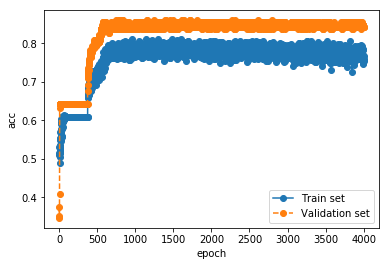

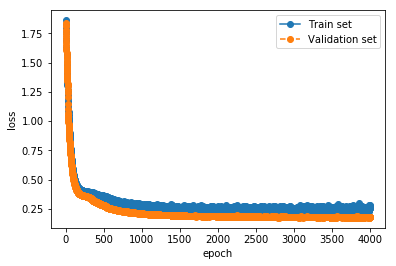

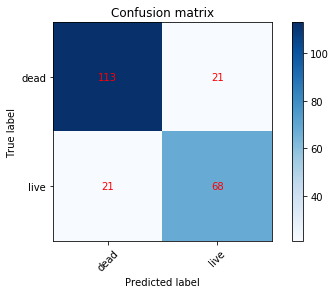

In [12]:
set_verbosity(ERROR)
epochs= 3000

running = Estimate_fasterD(epochs)#Estimate_Deeptime(epochs)
time_summary2 = TimeSummary()
monitor2 = EarlyStopping(monitor='val_cross',mode='auto',verbose=0)
checkpoint2 = ModelCheckpoint(filepath='model_save/2weights.modelone_titanic.hdf5',
                             mode='atuo',save_weights_only=True)


model2 = titanic_model_2()
model2.compile(optimizer='Adam',loss=mean_absolute_error, metrics=['accuracy'])
summary = model2.fit(x, y, validation_split=0.20,
                    verbose=0,
                    callbacks=[time_summary2,monitor2,checkpoint2,running],
                    batch_size=100,
                    epochs=epochs)

model2.load_weights("model_save/2weights.modelone_titanic.hdf5")
score2 = model2.evaluate(x_test,y_test)
print("final loss = ",score2[0])
print('fincal accuracy = ',score2[1])


pred2 = model2.predict(x_test)
pred2 = np.argmax(pred2,axis=1)
y_camper = np.argmax(y_test, axis=1)
print('#############################')
plot_training_summary(summary, time_summary2)

cm2 = confusion_matrix(y_camper,pred2)
plot_confusion_matrix(cm2,['dead','live'])

In [140]:
# save model
import os
save_path = "model_save/"
model_json = model2.to_json()

with open(os.path.join(save_path,"titanic_model_p.json"),'w') as f:
    f.write(model_json)

<div id="#test_data" style="width:100%;height:70px;border: 4px solid #392424;background-color:#392424;color:white;text-align:center;border-radius: 25px;padding:3px">
  <header><h2><b>Test Data</b></h2></header>
</div>

In [ ]:
# laod model:
#save_path=''
from tensorflow.keras.models import load_model
model = load_model(os.path.join(save_path,"titanic_model_81p.json"))